In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\okumb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\okumb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\okumb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Correct the path by using a raw string
path = r'C:\Users\okumb\Downloads\20th-century\.venv\Scripts\key_events_20th_century.txt'

# Open the file using 'with' to ensure it gets closed after reading
with open(path, 'r', errors='ignore') as file: 
    data = file.read().replace('\n', ' ')

## Tokenize 

In [3]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['  Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance      Appearance move to sidebar hide  TextSmallStandardLargeThis page always uses small font sizeWidthStandardWideThe content is as wide as possible for your browser window.Color (beta)AutomaticLightDarkReport an issue with dark modeThis page is always in light mode.', 'Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                                      Toggle the table of contents      Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events 

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'to', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'is', 'as', 'wide', 'as', 'possible', 'for', 'your', 'browser', 'window.Color', '(', 'beta', ')', 'AutomaticLightDarkReport', 'an', 'issue', 'with', 'dark', 'modeThis', 'page', 'is', 'always', 'in', 'light', 'mode', '.', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Toggle', 'the', 'table', 'of', 'contents', 'Contents', '

In [5]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4918 samples and 21308 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1571),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 398),
 ('The', 331),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 292)]

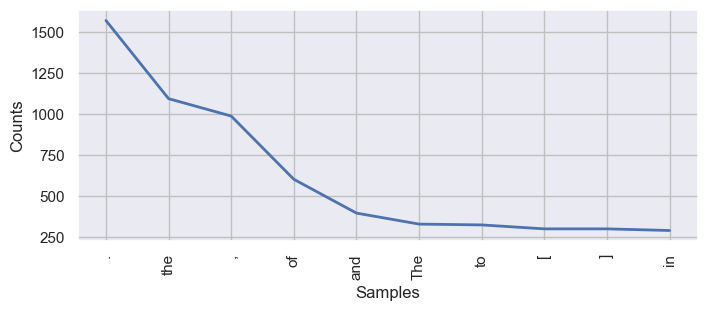

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## StopWords

In [8]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{"don't", 'than', "mightn't", 'did', 'ourselves', "isn't", 'whom', 'from', 'other', 'won', 'i', 'herself', 'needn', 'we', 'have', 'once', 'until', 'hadn', 'shouldn', 'against', 'which', 'yourself', 'for', 'before', 'here', "wasn't", "weren't", "couldn't", 'why', 'shan', 'too', 'yours', 'about', "she's", 'just', 'at', "doesn't", 'up', 'during', "didn't", "wouldn't", 'were', 'between', "you've", 'a', 'wasn', "should've", 'below', 'do', 'd', 'doesn', 'y', 'are', 'not', 'but', "hasn't", 'having', 'only', 'through', 'his', 'themselves', 'same', 'am', 'theirs', 'while', 'all', 'she', "it's", 'what', 'out', 've', 'he', 'because', 'wouldn', 'doing', 'mustn', 'weren', 'these', 'mightn', 'it', 'll', 'most', 'as', 'her', 'such', 'had', 's', 'is', 'himself', "needn't", "won't", 'me', 'does', 'ours', 'an', 'of', 'with', 'under', 'was', 'where', 'and', 'above', 'by', 'each', "you'd", 're', 'any', 'ma', 'hasn', 'can', 'how', 'ain', 'those', 'very', 'them', 'been', 'couldn', "shan't", 'again', 'him', 

In [9]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [10]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'file',
 'Search',
 'Search',
 'Appearance',
 'Appearance',
 'move',
 'sidebar',
 'hide',
 'TextSmallStandardLargeThis',
 'page',
 'always',
 'uses',
 'small',
 'font',
 'sizeWidthStandardWideThe',
 'content',
 'wide',
 'possible',
 'browser',
 'window.Color',
 '(',
 'beta',
 ')',
 'AutomaticLightDarkReport',
 'issue',
 'dark',
 'modeThis',
 'page',
 'always',
 'light',
 'mode',
 '.',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Toggle',
 'table',
 'contents',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',


In [11]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4814 samples and 16637 outcomes>


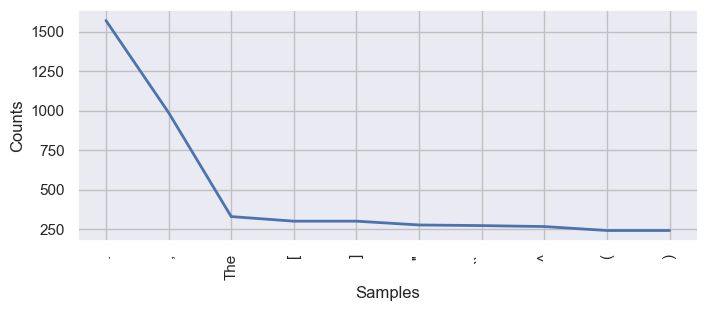

In [12]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [13]:
dist_words_filter

FreqDist({'.': 1571, ',': 989, 'The': 331, '[': 302, ']': 302, "''": 278, '``': 274, '^': 268, '(': 243, ')': 243, ...})

In [14]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [15]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Search    Search    Appearance    Appearance    move    sidebar    hide    TextSmallStandardLargeThis    page    always    uses    small    font    sizeWidthStandardWideThe    content    wide    possible    browser    window Color         beta         AutomaticLightDarkReport    issue    dark    modeThis    page    always    light    mode         Create    account    Log    Personal    tools    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Toggle    table    contents    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    s

In [16]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'wide', 'possible', 'browser', 'window', 'Color', 'beta', 'AutomaticLightDarkReport', 'issue', 'dark', 'modeThis', 'page', 'always', 'light', 'mode', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Toggle', 'table', 'contents', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning'

In [17]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

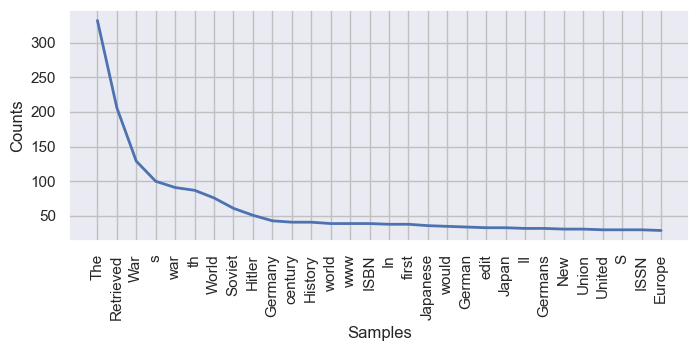

In [18]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [19]:
dist_words_filter_2.most_common(20)

[('The', 332),
 ('Retrieved', 206),
 ('War', 129),
 ('s', 100),
 ('war', 91),
 ('th', 87),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 51),
 ('Germany', 43),
 ('century', 41),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34)]

## POS Tags with TextBlob

In [20]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [21]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [22]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 5 ms


In [23]:
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Appearance', 'move', 'sidebar', 'hide', 'TextSmallStandardLargeThis', 'page', 'always', 'uses', 'small', 'font', 'sizeWidthStandardWideThe', 'content', 'wide', 'possible', 'browser', 'window', 'Color', 'beta', 'AutomaticLightDarkReport', 'issue', 'dark', 'modeThis', 'page', 'always', 'light', 'mode', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Toggle', 'table', 'contents', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'world', 'beginni

In [24]:
tags_list = text.tags

In [25]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Appearance", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'",

In [26]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [27]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [28]:
df_t = df_text.groupby('Word type').count().reset_index()

In [29]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,14
3,EX,12
4,FW,43


In [34]:
top10 = df_t.nlargest(10, 'Words')

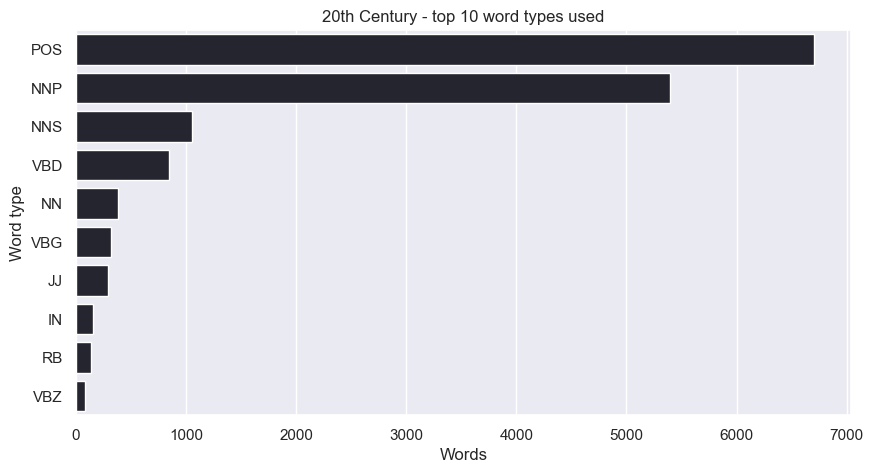

In [35]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century - top 10 word types used")

## Nouns

In [53]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [37]:
top15

,Word,Occurences
1262,'War,129
2596,'war,91
2516,'th,87
1309,'World,76
1108,'Soviet,61
539,'Hitler,51
538,'History,41
1502,'century,41
561,'ISBN,39
2622,'world,39


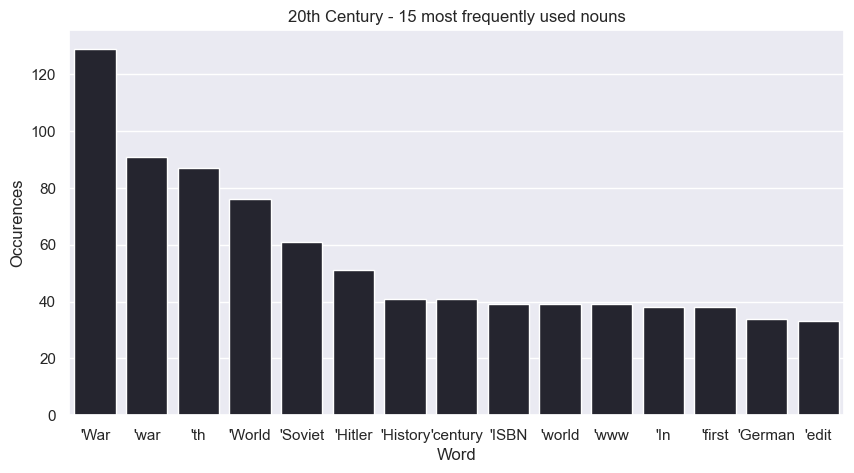

In [40]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th Century - 15 most frequently used nouns")

## Verbs

In [41]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(10, 'Occurences')

In [42]:
top15

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
76,'changed,7


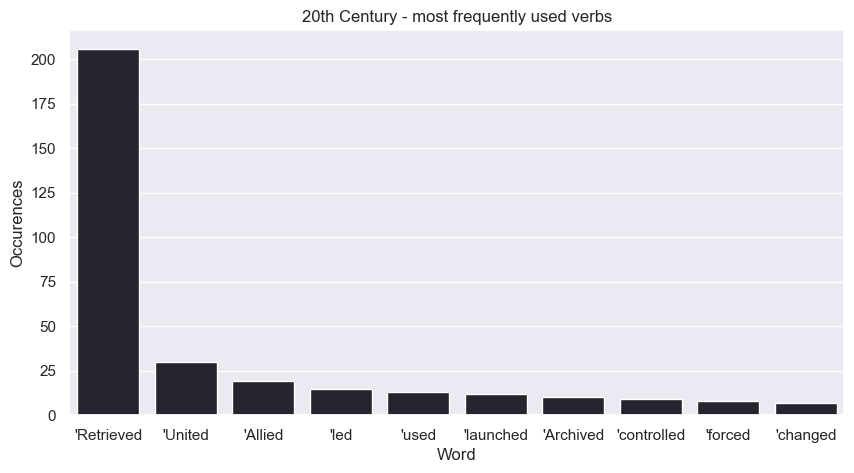

In [43]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th Century - most frequently used verbs")

## Adjectives

In [44]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(10, 'Occurences')

In [45]:
top15

,Word,Occurences
28,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
1,'African,6
104,'political,6
43,'Russian,6
105,'possible,6
7,'Baltic,5


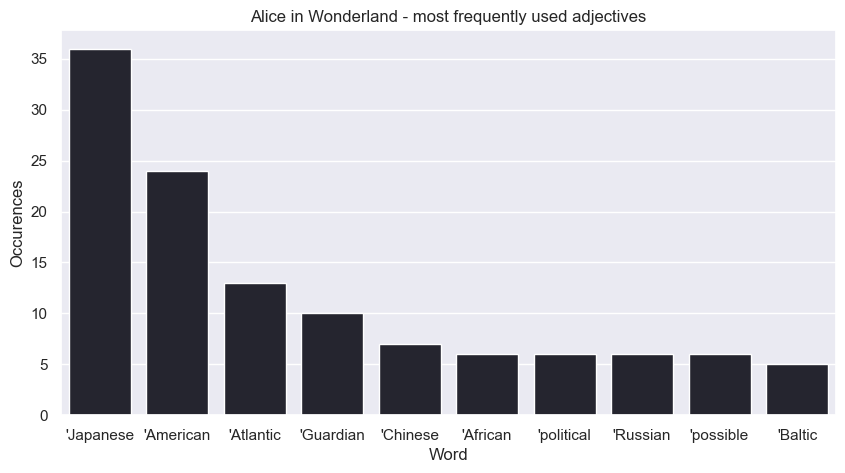

In [48]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("Alice in Wonderland - most frequently used adjectives")

## Counting frequency of each countries

In [57]:
# Correct the path by using a raw string
path = r"C:\Users\okumb\Downloads\20th-century\.venv\countries_list_20th_century_1.5.csv"

# Extract the CSV file as a Dataframe
df_country = pd.read_csv(path)

In [71]:
# Remove leading/trailing whitespace, apostrophes, and ensure consistent casing
df['Word'] = df['Word'].str.replace("'", "").str.strip()
df_country['country_name'] = df_country['country_name'].str.strip()

C:\Users\okumb\AppData\Local\Temp\ipykernel_92092\2875301483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word'] = df['Word'].str.replace("'", "").str.strip()


In [72]:
df_country.head()

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [73]:
df.head()

,Word,Occurences
1,Key,NNP
3,events,NNS
5,th,NNP
7,century,NNP
9,Wikipedia,NNP


In [74]:
# Initialize a dictionary to store the counts
country_counts = {country: 0 for country in df_country['country_name']}

In [75]:
# Iterate through each country in the list
for country in df_country['country_name']:
    # Count occurrences of the country in the 'text' column
    country_counts[country] = df['Word'].str.contains(country, case=False).sum()

C:\Users\okumb\AppData\Local\Temp\ipykernel_92092\3776197425.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  country_counts[country] = df['Word'].str.contains(country, case=False).sum()


In [76]:
# Convert the dictionary to a DataFrame for better visualization
df_counts = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Count'])

In [78]:
df_counts.head(10)

,Country,Count
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
5,Antigua and Barbuda,0
6,Argentina,0
7,Armenia,0
8,Australia,2
9,Austria,5


In [79]:

# Filter for countries mentioned more than once
filtered_counts_df = df_counts[df_counts['Count'] > 1]

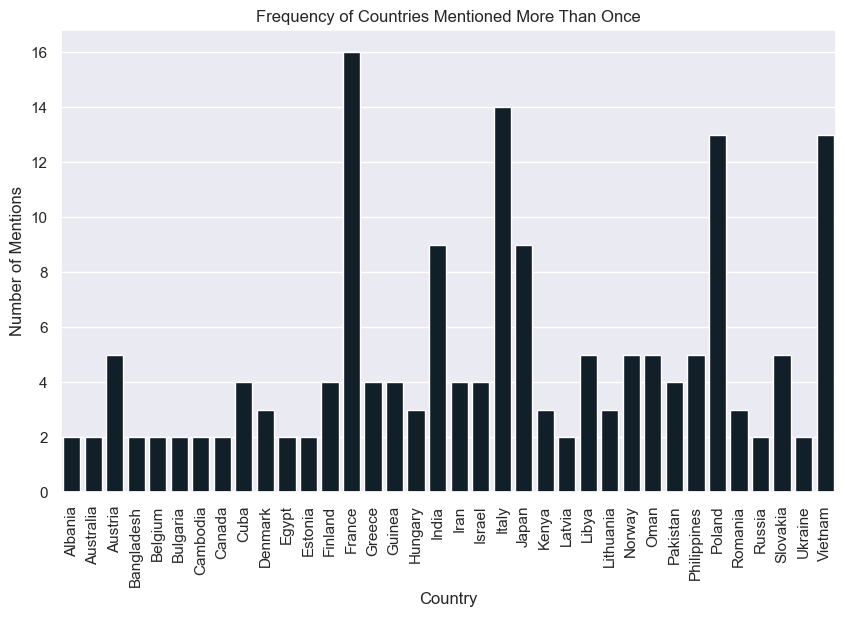

<Figure size 640x480 with 0 Axes>

In [84]:
# Plotting the results with vertical x-axis labels and revised color palette
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_counts_df, x='Country', y='Count', color='#0d1f2d')  # Using the 'viridis' color palette
plt.title('Frequency of Countries Mentioned More Than Once')
plt.xlabel('Country')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical
plt.show()
plt.savefig('country_mentions_plot.png')